In [1]:
# Load the libs
import framework
import numpy as np

In [2]:
data_sample = np.load('sample_data.npz')
# Load the sample data for testing the framework
data_frames = data_sample.f.data_frames
frame_label = data_sample.f.frame_label
frame_subject = data_sample.f.frame_subject

data_frames = np.reshape(data_frames, newshape=(data_frames.shape[0], data_frames.shape[1], data_frames.shape[2], 1))


In [3]:
# Select the frame labels
select_idx = [i for i, e in enumerate(frame_label) if e == 0 or e == 2]
data_frames_s = data_frames[select_idx]
frame_label_s = frame_label[select_idx]
frame_subject_s = frame_subject[select_idx]

In [4]:
class_unique = np.unique(frame_label_s)
class_unique = class_unique.tolist()
class_count = len(class_unique)
class_labels_n = []
for fl in frame_label_s:
    class_labels_n.append(class_unique.index(fl))
class_labels_n = np.asarray(class_labels_n)

In [5]:
ad_model = framework.AdversarialModel(data_samples = data_frames_s, class_label=class_labels_n, subject_label=frame_subject_s, exclude_idx=35, lam=0.5)

In [6]:
main_losses, adv_losses, main_accs, adv_accs, cf_matrix, test_acc = ad_model.train()

Pre-trained finished, the accuracy is: tensor(100.) and the loss is: tensor(0.0348, grad_fn=<NllLossBackward0>)
[1/50][0/724]	Loss_main: 0.7151	Loss_adv: 0.5018	Loss(x): 0.4642	D(G(x)): 0.5000 / -0.0363
[2/50][0/724]	Loss_main: 0.7062	Loss_adv: 0.5553	Loss(x): 0.4285	D(G(x)): 0.5000 / -0.0927
[3/50][0/724]	Loss_main: 0.6945	Loss_adv: 0.6832	Loss(x): 0.3529	D(G(x)): 0.5000 / -0.1886
[4/50][0/724]	Loss_main: 0.6919	Loss_adv: 0.8351	Loss(x): 0.2743	D(G(x)): 0.5000 / -0.3228


In [ ]:
print(main_accs)

[tensor(51.2431), tensor(51.2431), tensor(51.9337), tensor(54.0055), tensor(58.0111), tensor(58.4254), tensor(62.5691), tensor(63.6740), tensor(64.6409), tensor(69.0608), tensor(72.3757), tensor(73.2044), tensor(77.2099), tensor(79.8343), tensor(80.3867), tensor(84.3923), tensor(85.7735), tensor(88.3978), tensor(86.1878), tensor(87.9834), tensor(91.4365), tensor(93.5083), tensor(92.5414), tensor(93.7845), tensor(95.7182), tensor(95.3039), tensor(97.2376), tensor(97.3757), tensor(97.9282), tensor(97.7901), tensor(98.0663), tensor(99.1713), tensor(98.2044), tensor(98.4807), tensor(99.7238), tensor(99.8619), tensor(99.7238), tensor(99.5856), tensor(99.8619), tensor(99.8619), tensor(100.), tensor(99.8619), tensor(100.), tensor(99.8619), tensor(99.8619), tensor(99.7238), tensor(100.), tensor(100.), tensor(100.), tensor(100.)]


In [ ]:
print(adv_accs)

[tensor(84.6685), tensor(85.0829), tensor(84.3923), tensor(84.8066), tensor(84.2541), tensor(83.9779), tensor(84.1160), tensor(83.8398), tensor(83.7017), tensor(83.4254), tensor(83.0110), tensor(83.0110), tensor(82.8729), tensor(83.0110), tensor(82.7348), tensor(82.3204), tensor(82.1823), tensor(82.3204), tensor(82.3204), tensor(82.0442), tensor(82.3204), tensor(82.1823), tensor(82.0442), tensor(81.7680), tensor(81.6298), tensor(81.3536), tensor(81.2155), tensor(81.0773), tensor(81.2155), tensor(81.0773), tensor(80.8011), tensor(80.9392), tensor(80.3867), tensor(79.9724), tensor(80.1105), tensor(79.8343), tensor(79.4199), tensor(79.8343), tensor(79.5580), tensor(78.7293), tensor(78.8674), tensor(78.1768), tensor(78.0387), tensor(77.7624), tensor(77.2099), tensor(77.0718), tensor(76.9337), tensor(76.7956), tensor(76.6575), tensor(76.7956)]


In [ ]:
print(test_acc)

0.6470588235294118


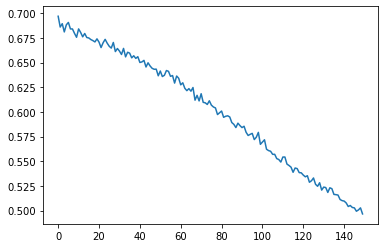

In [ ]:
import matplotlib.pyplot as plt
plt.plot(main_losses)

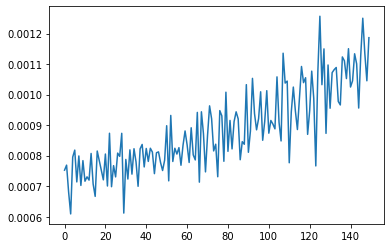

In [ ]:
plt.plot(adv_losses)